In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px #for three dimension graphs
import numpy as np

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mendacium  1000 non-null   float64
 1   Depth      1000 non-null   float64
 2   Price      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907


In [3]:
#previsualization
px.scatter_3d(df,x='Mendacium',y='Depth',z='Price')

In [4]:
X=df[['Mendacium','Depth']]
y=df[['Price']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)


In [5]:
#algo instantiate
model=RandomForestRegressor(max_depth=25)
model.fit(xtrain,ytrain)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6836\3935279864.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=25)

In [6]:
print("score:",model.score(xtest,ytest)*100)
pred=model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mse:",mean_absolute_error(y,pred))

score: 95.37336771761107
mse: 14.701972704579244
mse: 2.792053971322702


<AxesSubplot:ylabel='Density'>

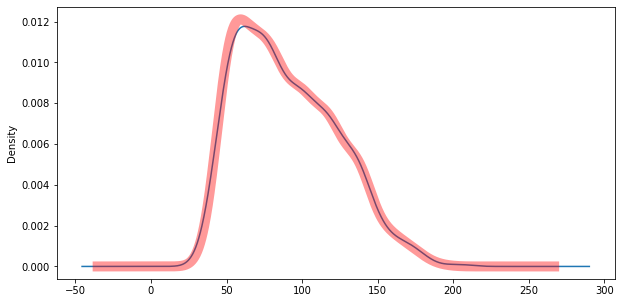

In [7]:
#visulization
df['pred_col']=pred
ax=df['Price'].plot(kind='kde',figsize=(10,5))
df['pred_col'].plot(kind='kde',ax=ax,alpha=.4,color='red',linewidth=10)


In [8]:
dump(model,"oil_pricing.pkl")

['oil_pricing.pkl']